In [1]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

import matplotlib.pyplot as plt

import numpy as np
import os
import json

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
import configparser
# --------------------------------------------------
# configparserの宣言とiniファイルの読み込み
# --------------------------------------------------
config_ini = configparser.ConfigParser()
config_ini.read('config.ini', encoding='utf-8')

#[MAXPOOLING, NORMALLSTM, MANY2MANY]
basename='MANY2MANY'

In [3]:
if basename == 'MAXPOOLING':
    from max_pooling import base_model, my_generator
if basename == 'NORMALLSTM':
    from normal_lstm import base_model, my_generator
if basename == 'MANY2MANY':
    from many_2_many import base_model, my_generator


#データの場所
data_folder =config_ini['DEFAULT']['Base_Dir']+"data/"
#モデルの保存場所
model_folder=config_ini['DEFAULT']['Base_Dir']+"model/"+config_ini[basename]['BaseName']+"/0/"

camera=int(config_ini['DEFAULT']['Camera'])
channels=int(config_ini['DEFAULT']['Channnels'])
img_width=int(config_ini['DEFAULT']['Width'])
img_height=int(config_ini['DEFAULT']['Height'])
timesteps=int(config_ini['DEFAULT']['Timesteps'])

In [4]:
train_path = data_folder + "test0/train/"
label_path = data_folder + "test0/label/"

list1 = os.listdir(train_path)
train_paths = []
label_paths = []
for i in range(len(list1)):
    train_paths.append(train_path+str(i)+".npy")
    label_paths.append(label_path+str(i)+".npy")
print(len(train_paths))

10815


In [5]:
# モデル定義
pred = base_model.Prediction(timesteps, camera, img_width, img_height)
model = pred.create_model()
print(model.summary())












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


TypeError: 'int' object is not iterable

In [10]:
val_count = int(len(train_paths) * 0.2)
train_gen = my_generator.MyGenerator(
                             train_paths[val_count:], 
                             label_paths[val_count:], 
                             batch_size=5)
val_gen = my_generator.MyGenerator(
                             train_paths[:val_count], 
                             label_paths[:val_count], 
                             batch_size=5)
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')
history = model.fit_generator(
    train_gen, 
    steps_per_epoch=train_gen.num_batches_per_epoch, 
    validation_data=val_gen,
    validation_steps=val_gen.num_batches_per_epoch,
    epochs=100,
    callbacks=[es_cb],
    shuffle=True)

Epoch 1/100
 535/1731 [========>.....................] - ETA: 10:48 - loss: 3.3396 - shared_Ratelayers_loss: 0.6679 - shared_Ratelayers_acc: 0.6135 - shared_Ratelayers_acc_1: 0.6135 - shared_Ratelayers_acc_2: 0.6135 - shared_Ratelayers_acc_3: 0.6135 - shared_Ratelayers_acc_4: 0.6135

KeyboardInterrupt: 

In [14]:
from keras.models import Model
def freeze(model):
    """Freeze model weights in every layer."""
    for layer in model.layers:
        layer.trainable = False

        if isinstance(layer,Model):
            freeze(layer)
    return model
model_freezed = freeze(model)
model_freezed.save('../../model/max_pooling/0/sample.tf')
with open(model_folder+'history.json', 'w') as f:
    json.dump(history.history, f)

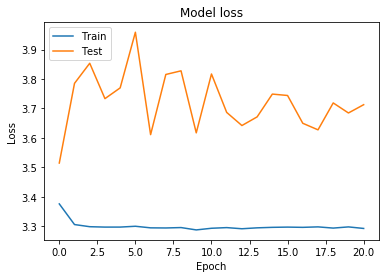

In [9]:
# Plot training & validation accuracy values
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
from max_pooling import base_model, my_generator
# モデル定義
pred1 = base_model.Prediction(5, 5, 50, 50)
model1 = pred1.create_model()
print(model1.summary())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 11, 50, 50, 3 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 11, 50, 50, 3 0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 11, 50, 50, 3 0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 11, 50, 50, 3 0                                            
_____________